### AR(1) Process
---

The AR(1) process:

$$
 x_t = \phi x_{t-1} + \epsilon_t,\quad \epsilon_t\sim\mathrm{Normal}(0,\sigma^2),
$$

is a type of time series model that is widely applied in economics, finance and other related fields.

The AR(1) process is a Markov chain and its transition kernel is

$$
 K(x_{t-1},x_t) = \frac1{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x_t-\phi x_{t-1})^2}{2\sigma^2}\right].
$$


In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

We suppose $\phi=0.9$, $\sigma^2=0.19$ and $x_0 \sim \mathrm{Uniform}\left(-\sqrt{3},\sqrt{3}\right)$.


The following figure shows the initial distribution:

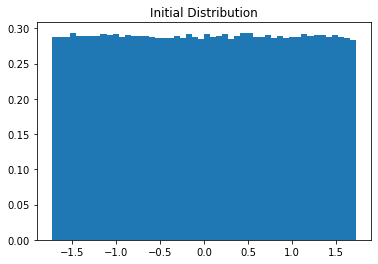

In [2]:
n = 1000000
x = st.uniform.rvs(loc=-np.sqrt(3.0), scale=2.0*np.sqrt(3.0), size=n)
plt.hist(x, density=True, bins=50)
plt.title('Initial Distribution')
plt.show()

The AR(1) process progresses from $t=0$ to $t=1$.

In [3]:
phi = 0.9
sigma = np.sqrt(0.19)
x = phi * x + st.norm.rvs(scale=sigma, size=n)

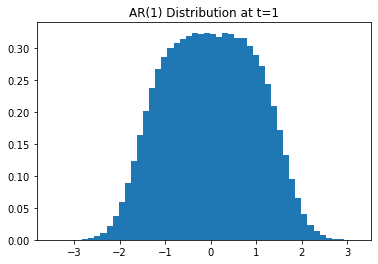

In [4]:
plt.hist(x, density=True, bins=50)
plt.title('AR(1) Distribution at t=1')
plt.show()

Then we repeat one more time.

In [5]:
x = phi * x + st.norm.rvs(scale=sigma, size=n)

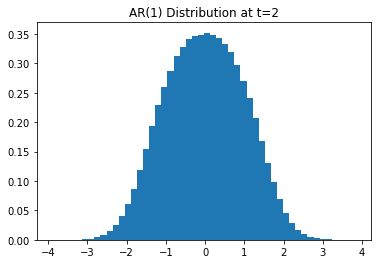

In [6]:
plt.hist(x, density=True, bins=50)
plt.title('AR(1) Distribution at t=2')
plt.show()

After we repeat the computation 20 times, we have the following histogram.

In [7]:
for t in range(18):
    x = phi * x + st.norm.rvs(scale=sigma, size=n)

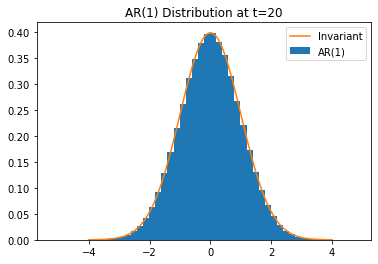

In [8]:
plt.hist(x, density=True, bins=50)
plt.title('AR(1) Distribution at t=20')
xgrid = np.linspace(-4.0, 4.0, 101)
plt.plot(xgrid, st.norm.pdf(xgrid))
plt.legend(['Invariant', 'AR(1)'])
plt.show()

The invariant (stationary) distribution of the AR(1) process is $\mathrm{Normal}\left(0,\frac{\sigma^2}{1-\phi^2}\right)$.

In this example, it is the standard normal distributin.
